## Training


In [1]:
!pip install pandas-profiling


In [ ]:
import pandas as pd
import pandas_profiling

import matplotlib.pyplot as plt

### Exploração inicial

In [ ]:
#Read the data using the Unnamed (probably id) as index
url = 'https://s3.amazonaws.com/drivendata/data/4/public/81e8f2de-9915-4934-b9ae-9705685c9d50.csv'
training = pd.read_csv(url, index_col='Unnamed: 0')

### Separando labels e variáveis

In [ ]:
labels = ['Function', 'Object_Type', 'Operating_Status', 'Position_Type', 'Pre_K', 'Reporting', 'Sharing', 'Student_Type', 'Use']

features = ['FTE', 'Facility_or_Department', 'Function_Description', 'Fund_Description', 'Job_Title_Description', 'Location_Description', 'Object_Description', 'Position_Extra', 'Program_Description', 'SubFund_Description', 'Sub_Object_Description', 'Text_1', 'Text_2', 'Text_3', 'Text_4', 'Total']

In [5]:
training[features].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400277 entries, 134338 to 415831
Data columns (total 16 columns):
FTE                       126071 non-null float64
Facility_or_Department    53886 non-null object
Function_Description      342195 non-null object
Fund_Description          202877 non-null object
Job_Title_Description     292743 non-null object
Location_Description      162054 non-null object
Object_Description        375493 non-null object
Position_Extra            264764 non-null object
Program_Description       304660 non-null object
SubFund_Description       306855 non-null object
Sub_Object_Description    91603 non-null object
Text_1                    292285 non-null object
Text_2                    88217 non-null object
Text_3                    109152 non-null object
Text_4                    53746 non-null object
Total                     395722 non-null float64
dtypes: float64(2), object(14)
memory usage: 51.9+ MB


In [6]:
training[features].describe()

,FTE,Total
count,126071.000000,3.957220e+05
mean,0.426794,1.310586e+04
std,0.573576,3.682254e+05
min,-0.087551,-8.746631e+07
25%,0.000792,7.379770e+01
50%,0.130927,4.612300e+02
75%,1.000000,3.652662e+03
max,46.800000,1.297000e+08


In [7]:
training[features].describe(include='all')

,FTE,Facility_or_Department,Function_Description,Fund_Description,Job_Title_Description,Location_Description,Object_Description,Position_Extra,Program_Description,SubFund_Description,Sub_Object_Description,Text_1,Text_2,Text_3,Text_4,Total
count,126071.000000,53886,342195,202877,292743,162054,375493,264764,304660,306855,91603,292285,88217,109152,53746,3.957220e+05
unique,NaN,179,687,141,3516,354,602,580,421,274,182,1423,301,34,244,NaN
top,NaN,All Campus Payroll,NON-PROJECT,General Operating Fund,"Teacher, Elementary",School,EMPLOYEE BENEFITS,PROFESSIONAL-INSTRUCTIONAL,GENERAL ELEMENTARY EDUCATION,GENERAL FUND,Extra Duty Pay/Overtime For Support Personnel,REGULAR INSTRUCTION,TEACHER SUBS,Regular,Regular Instruction,NaN
freq,NaN,17697,76890,33467,30939,65524,47495,92136,32829,123327,9159,64896,16599,94462,10762,NaN
mean,0.426794,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.310586e+04
std,0.573576,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.682254e+05
min,-0.087551,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-8.746631e+07
25%,0.000792,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.379770e+01
50%,0.130927,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.612300e+02
75%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.652662e+03


In [8]:
training[features].head()

,FTE,Facility_or_Department,Function_Description,Fund_Description,Job_Title_Description,Location_Description,Object_Description,Position_Extra,Program_Description,SubFund_Description,Sub_Object_Description,Text_1,Text_2,Text_3,Text_4,Total
134338,1.0,NaN,NaN,General Fund,Teacher-Elementary,NaN,NaN,KINDERGARTEN,KINDERGARTEN,NaN,NaN,NaN,NaN,NaN,NaN,50471.810
206341,NaN,NaN,RGN GOB,NaN,(blank),NaN,CONTRACTOR SERVICES,UNDESIGNATED,BUILDING IMPROVEMENT SERVICES,BUILDING FUND,NaN,BUILDING IMPROVEMENT SERVICES,BOND EXPENDITURES,Regular,NaN,3477.860
326408,1.0,NaN,NaN,General Purpose School,TCHER 2ND GRADE,NaN,Personal Services - Teachers,TEACHER,Instruction - Regular,NaN,NaN,NaN,NaN,NaN,Regular Instruction,62237.130
364634,NaN,NaN,UNALLOC BUDGETS/SCHOOLS,NaN,"Teacher, Short Term Sub",NaN,EMPLOYEE BENEFITS,PROFESSIONAL-INSTRUCTIONAL,GENERAL MIDDLE/JUNIOR HIGH SCH,GENERAL FUND,NaN,REGULAR INSTRUCTION,TEACHER SUBS,Regular,NaN,22.300
47683,NaN,NaN,NON-PROJECT,NaN,"Teacher, Secondary (High)",NaN,TEACHER COVERAGE FOR TEACHER,PROFESSIONAL-INSTRUCTIONAL,GENERAL HIGH SCHOOL EDUCATION,GENERAL FUND,NaN,REGULAR INSTRUCTION,TEACHER SUBS,Alternative,NaN,54.166


In [9]:
training.isnull().sum()

Function                       0
Use                            0
Sharing                        0
Reporting                      0
Student_Type                   0
Position_Type                  0
Object_Type                    0
Pre_K                          0
Operating_Status               0
Object_Description         24784
Text_2                    312060
SubFund_Description        93422
Job_Title_Description     107534
Text_3                    291125
Text_4                    346531
Sub_Object_Description    308674
Location_Description      238223
FTE                       274206
Function_Description       58082
Facility_or_Department    346391
Position_Extra            135513
Total                       4555
Program_Description        95617
Fund_Description          197400
Text_1                    107992
dtype: int64

In [10]:
pandas_profiling.ProfileReport(training[features])

Number of variables,17
Number of observations,400277
Total Missing (%),43.2%
Total size in memory,51.9 MiB
Average record size in memory,136.0 B
Numeric,3
Categorical,14
Boolean,0
Date,0
Text (Unique),0
Rejected,0


#### Overview

*FTE*: 68.5% of the values are missing, cannot be dropped. Requires imputation. Negatives values may be investigated. (All to 0?)

*Facility_or_Department*: 86,5% of the data missing, required imputation. 

*Function_Description*: 14.5% missing

*Fund_descrioption*: 49.3% missing. "General fund" and "GENERAL FUND" are the same, which can be resolved by applying transofrming the string to lowercase. Remove quotes is necessary.

*Job_Title_Description*: 26.9% missing + 3.8% "(blank)"

*Location_Description*: 59.5% missing

*Object_Description*: 6.2% missing. This column has some values like "salaries of part time employee", which can have some correlation with the `FTE` column.

*Position_Extra*: 33.9% missing. (UNDESIGNATED?)

*Program_description*: 23.9% missing.

*SubFund_Description*: 23.3% missing.

*Sub_Object_Description*: 77.1% missing.

*Text_1*: 27% missing. This column seems to be organized.

*Text_2*: 78% missing. Same as Text_1 in the aspect of data consistency.

*Text_3*: 72.7% missing.

*Text_4*: 86.6% missing. It has "Undistributed" values. This is present in other descriptions?

*Total* : 1.1% missing (could be deleted). Minimum is -87466000 and maximum is 129700000. (TODO: check extreme values at a local host)

Options on imputation:

 - Group by categories and fill the mode in each category (may introduce a bias)
 - Median

### Exploring numeric data
Based on `describe`, `head` and `info`results, some values look inconsistent and some columns have several data missing.

First, investigate the `Job_Title_Description` column that, besides the NaN values, also assumes a `(blank)` value.

In [11]:
job_title = training['Job_Title_Description']

len(job_title.unique())

3517

In [12]:
job_title[ job_title.isnull() | job_title.str.contains('(blank)') ].shape[0]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


122769

The 'Total' column, intuitively, is a very important one, and there are several data missing. Let's check if we can remove the rows

In [13]:
totals_null = training[features][ training['Total'].isnull() ]

# If they don't hav fund_description maybe htne can be dropped
totals_null['Fund_Description'].isnull().sum()

3038

In [14]:
totals_null['Fund_Description'].value_counts().sum()

1517

### Checking extreme values for FTE and Total columns

Both numeric columns have some weird minimum and maximum values. In this section, this values will be investigated using graphic visualizations.

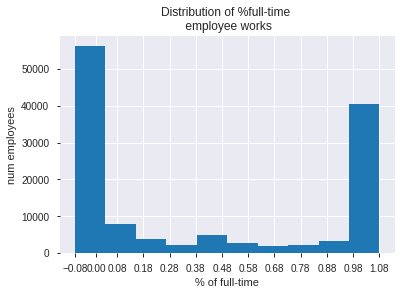

In [15]:
%matplotlib inline
plt.hist(training['FTE'].dropna(), range=(-0.08,1.08), bins=10)

# Add title and labels
plt.title('Distribution of %full-time \n employee works')
plt.xlabel('% of full-time')
plt.ylabel('num employees')

plt.xticks(ticks=[-0.08, 0.0, 0.08, 0.18,0.28,0.38, 0.48, 0.58, 0.68, 00.78,0.88,0.98, 1.08])

plt.show()

In [16]:
training[training['FTE'] <= 0.004].shape[0]

35372

In [17]:
training['FTE'].describe()

count    126071.000000
mean          0.426794
std           0.573576
min          -0.087551
25%           0.000792
50%           0.130927
75%           1.000000
max          46.800000
Name: FTE, dtype: float64

There are some inconsistent values at the `FTE` column. If the values represent the percentage of time a employee works, negative values make no sense.

In [18]:
training['Total'].describe()

count    3.957220e+05
mean     1.310586e+04
std      3.682254e+05
min     -8.746631e+07
25%      7.379770e+01
50%      4.612300e+02
75%      3.652662e+03
max      1.297000e+08
Name: Total, dtype: float64

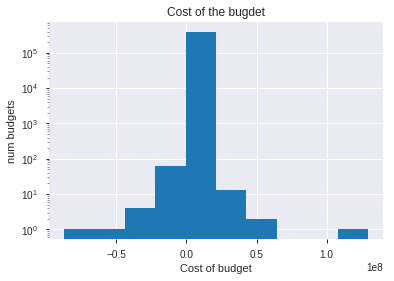

In [19]:
plt.hist(training['Total'].dropna(), log=True)

# Add title and labels
plt.title('Cost of the bugdet')
plt.xlabel('Cost of budget')
plt.ylabel('num budgets')

plt.show()

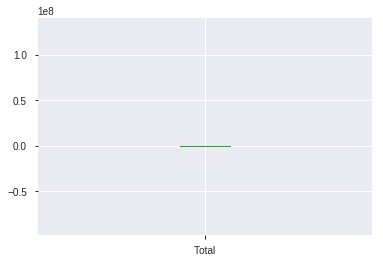

In [20]:
training['Total'].dropna().plot(kind='box')
plt.show()

This column represents the cost of a expenditure, so it makes no sense having a cost less than 0.

### Exploring categoric data

Using the `info()` and the pandas-profiling output, we can see that the categoric data is shown as type "object" instead of "category", which requires a conversion. The missing data also has to be treated.

### Chooing the labels
We aim here to classify only one group from labels. Let's see which has the best distribution of classes

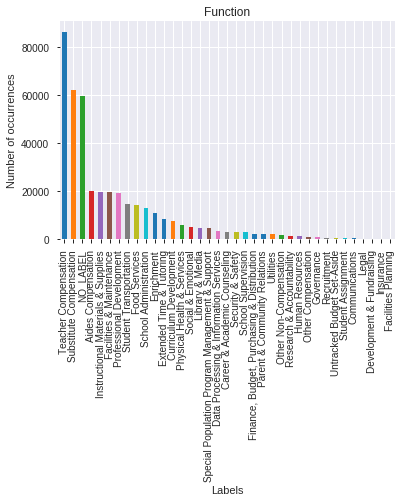

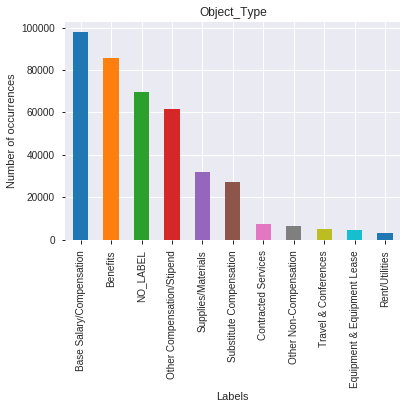

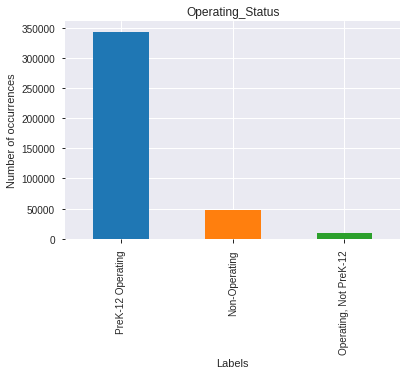

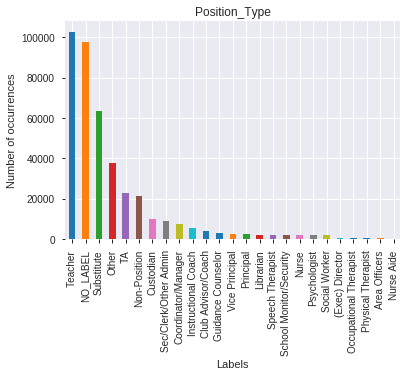

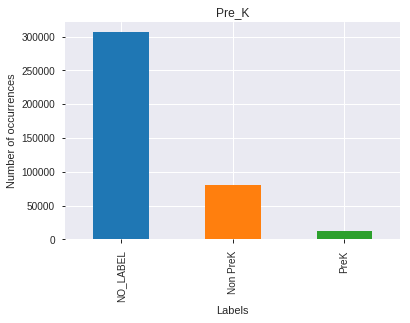

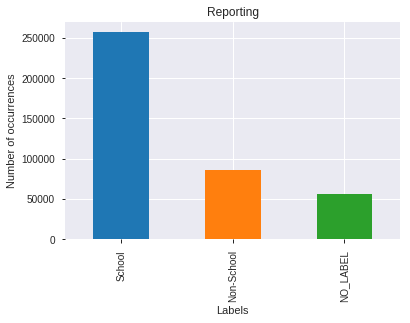

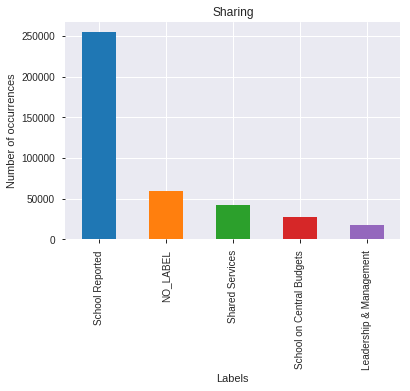

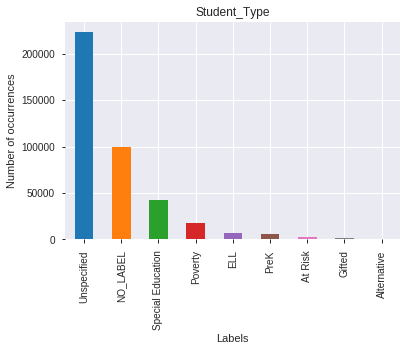

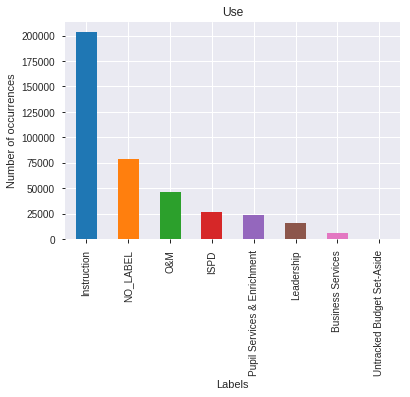

In [27]:
for i in range(len(labels)):
  categories = training[labels[i]].value_counts()

  categories.plot(kind='bar')

  # Label the axes
  plt.xlabel('Labels')
  plt.ylabel('Number of occurrences')
  plt.title(labels[i])

  # Display the plot
  plt.show()

The most interesting category seems to be `Object_Type`, which contains some interesting labels, that allows us to predict if the budget is related to salary or material, for example, and also has a good amount of instances from each class.